In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
# data = pd.read_csv('https://drive.google.com/file/d/1ClBptsK3V5KgKXtK2GSRzFNAW7GnTPDW/view?usp=sharing',header=None)
# while using the drive link I was getting below error so downloaded the file instead.
# "ParserError: Error tokenizing data. C error: Expected 279 fields in line 132, saw 434"
data = pd.read_csv('ratings_Electronics.csv',header=None)
data.head()

,0,1,2,3
0,AKM1MP6P0OYPR,0132793040,5.0,1365811200
1,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
2,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
3,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
4,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200


## BASIC EDA

In [3]:
data.columns=['userId','productId','ratings','timestamp']
data.head()

,userId,productId,ratings,timestamp
0,AKM1MP6P0OYPR,0132793040,5.0,1365811200
1,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
2,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
3,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
4,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200


In [4]:
print('no.of rows',data.shape[0])
print('no.of columns',data.shape[1])

no.of rows 7824482
no.of columns 4


In [5]:
data.dtypes

userId        object
productId     object
ratings      float64
timestamp      int64
dtype: object

In [6]:
print('No. of Missing Values\n',data.isnull().sum())

No. of Missing Values
 userId       0
productId    0
ratings      0
timestamp    0
dtype: int64


### There are no missing values in the dataset.

In [7]:
data = data.iloc[0:782448,:]  # taking 10% of data as its a huge dataset and I am facing some memory issue here.
data.head()

,userId,productId,ratings,timestamp
0,AKM1MP6P0OYPR,0132793040,5.0,1365811200
1,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
2,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
3,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
4,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200


In [8]:
# Summary statistics of 'rating' variable
data['ratings'].describe().T

count    782448.000000
mean          3.981954
std           1.396133
min           1.000000
25%           3.000000
50%           5.000000
75%           5.000000
max           5.000000
Name: ratings, dtype: float64

In [9]:
print('min_rating is: ',data['ratings'].min())
print('max_rating is: ',data['ratings'].max())

min_rating is:  1.0
max_rating is:  5.0


### we have 5 ratings ranginging from 1 to 5

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001CB92A0D0C8>]],
      dtype=object)

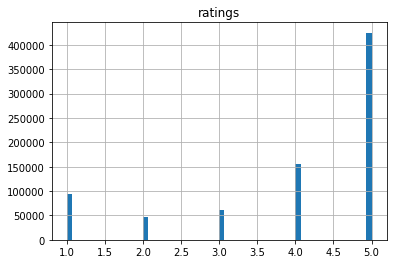

In [10]:
# Checking the distribution of ratings
data.hist(column='ratings',stacked=False, bins=60)

### Most of the people have given rating of 5 while very few have given a rating of 2

C:\Users\kjaiswal02\Anaconda3\lib\site-packages\seaborn\categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


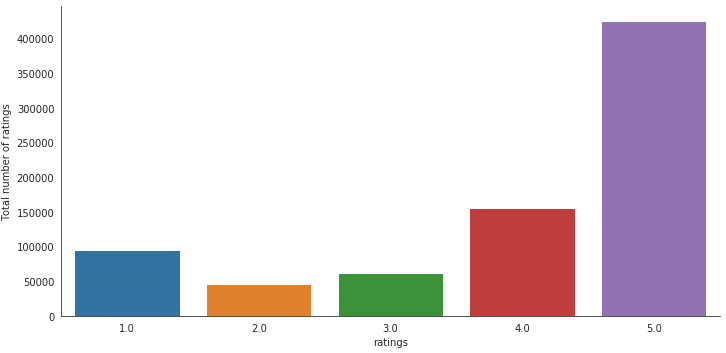

In [11]:
# Checking the distribution of ratings through factor plot
with sns.axes_style('white'):
    g = sns.factorplot("ratings", data=data, aspect=2.0,kind='count')
    g.set_ylabels("Total number of ratings") 

In [12]:
print('Total Number of unique userid in dataframe: ',data['userId'].nunique())
print('Total Number of unique products in dataframe: ',data['productId'].nunique())


Total Number of unique userid in dataframe:  606149
Total Number of unique products in dataframe:  47105


### 606149 unique users have rated 47105 products

In [13]:
## Top 10 users based on rating counts
dataf=data.drop('timestamp',axis=1)
most_rated = dataf.groupby('userId').size().sort_values(ascending=False)[:10]
print(most_rated)

userId
A5JLAU2ARJ0BO     384
A231WM2Z2JL0U3    249
A25HBO5V8S8SEA    163
A6FIAB28IS79      113
AT6CZDCP4TRGA     112
AKT8TGIT6VVZ5     108
A11D1KHM7DVOQK    106
A2B7BUH8834Y6M     98
A2AEZQ3DGBBLPR     81
A2R6RA8FRBS608     79
dtype: int64


### Taking subset of dataset to make it less sparse/ dense. (For example, I am keeping the users who have given 50 or more number of ratings)

In [14]:
counts = dataf['userId'].value_counts()
# print(counts[counts>50])
df_final=dataf[dataf['userId'].isin(counts[counts>50].index)]
df_final.head()

,userId,productId,ratings
2162,A5JLAU2ARJ0BO,1400532655,1.0
7381,A2AEZQ3DGBBLPR,B000000O48,5.0
7448,A2R6RA8FRBS608,B000001OL6,4.0
7789,A11D1KHM7DVOQK,B000001OMN,2.0
8732,A6FIAB28IS79,B00000J05A,3.0


In [15]:
df_final.shape

(2450, 3)

In [16]:
print('Number of users who have rated 50 or more items =', len(df_final))
print('Number of unique USERS in final data = ', df_final['userId'].nunique())
print('Number of unique ITEMS in final data = ', df_final['productId'].nunique())

Number of users who have rated 50 or more items = 2450
Number of unique USERS in final data =  25
Number of unique ITEMS in final data =  2125


#### Calculating the density of matrix

In [17]:
final_ratings_matrix = df_final.pivot(index = 'userId', columns ='productId', values = 'ratings').fillna(0)
print('Shape of final_ratings_matrix: ', final_ratings_matrix.shape)
given_num_of_ratings = np.count_nonzero(final_ratings_matrix)
print('given_num_of_ratings = ', given_num_of_ratings)
possible_num_of_ratings=final_ratings_matrix.shape[0]*final_ratings_matrix.shape[1]
print('possible_num_of_ratings = ', possible_num_of_ratings)
density = (given_num_of_ratings/possible_num_of_ratings)
density *= 100
print('density: {:4.2f}%'.format(density))


Shape of final_ratings_matrix:  (25, 2125)
given_num_of_ratings =  2450
possible_num_of_ratings =  53125
density: 4.61%


## Popularity Recommender model

In [18]:
final_ratings_matrix.head()

productId,1400532655,B000000O48,B000001OL6,B000001OMN,B00000J05A,B00000J061,B00000J0E8,B00000J1E6,B00000J1EP,B00000J1G6,...,B000BQ57BU,B000BQ7GW8,B000BQVYIA,B000BSLTIS,B000BSLTMY,B000BSOBG0,B000BTFZZA,B000BTL0OA,B000BTPVHW,B000BTQXUG
userId,,,,,,,,,,,,,,,,,,,,,
A11D1KHM7DVOQK,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A12DLJESJKM1OQ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A149RNR5RH19YY,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0
A1F9Z42CFF9IAY,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A1FR68QH6Z4YZM,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
ratings_mean= pd.DataFrame(df_final.groupby('productId')['ratings'].mean().sort_values(ascending=False))
ratings_mean.head()

,ratings
productId,
B00005KC6B,5.0
B00004XRDN,5.0
B0000AINEH,5.0
B0000AKA90,5.0
B0000AKVJC,5.0


### TOP 5 products recommended

In [20]:
 # score represents how many ratings a particular product has got
ratings_mean['score'] = pd.DataFrame(df_final.groupby('productId')['ratings'].count())
ratings_mean.head() 

,ratings,score
productId,,
B00005KC6B,5.0,1
B00004XRDN,5.0,1
B0000AINEH,5.0,1
B0000AKA90,5.0,1
B0000AKVJC,5.0,1


### Above dataframe represents the products that will be recommended to all the users based on highest rating(popularity) but the products that are recommnded here have been rated by only one user(score=1) so I am using one more condition where I am picking the top 5 product who has been rated by max user in descending fashion below then taking the mean of it to recommend the product based on highest rating.

In [21]:
ratings_mean_user_count = pd.DataFrame(df_final.groupby('productId')['ratings'].count().sort_values(ascending=False))
ratings_mean_user_count.rename(columns={'ratings' : 'score'},inplace=True)
ratings_mean_user_count.head()


,score
productId,
B00004SB92,6
B00008OE6I,5
B000BKJZ9Q,4
B00007KDVI,4
B0000645C9,4


In [22]:
ratings_mean_user_count['ratings']= pd.DataFrame(df_final.groupby('productId')['ratings'].mean().sort_values(ascending=False))
ratings_mean_user_count.head()

,score,ratings
productId,,
B00004SB92,6,4.50
B00008OE6I,5,4.60
B000BKJZ9Q,4,4.00
B00007KDVI,4,3.00
B0000645C9,4,3.75


In [23]:
popularity_recommendations=ratings_mean_user_count.head()
popularity_recommendations

,score,ratings
productId,,
B00004SB92,6,4.50
B00008OE6I,5,4.60
B000BKJZ9Q,4,4.00
B00007KDVI,4,3.00
B0000645C9,4,3.75


In [24]:
# Use popularity based recommender model to make predictions
def recommend(user_id):     
    user_recommendations = popularity_recommendations 
          
    #Add user_id column for which the recommendations are being generated 
    user_recommendations['userID'] = user_id 
      
    #Bring user_id column to the front 
    cols = user_recommendations.columns.tolist() 
    cols = cols[-1:] + cols[:-1] 
    user_recommendations = user_recommendations[cols] 
          
    return user_recommendations 

In [25]:
find_recom = ['A11D1KHM7DVOQK','A2R6RA8FRBS608','A6FIAB28IS79']   # This list is user choice.
for i in find_recom:
    print("Here is the recommendation for the userId: %s\n" %(i))
    print(recommend(i))    
    print("\n") 

Here is the recommendation for the userId: A11D1KHM7DVOQK

                    userID  score  ratings
productId                                 
B00004SB92  A11D1KHM7DVOQK      6     4.50
B00008OE6I  A11D1KHM7DVOQK      5     4.60
B000BKJZ9Q  A11D1KHM7DVOQK      4     4.00
B00007KDVI  A11D1KHM7DVOQK      4     3.00
B0000645C9  A11D1KHM7DVOQK      4     3.75


Here is the recommendation for the userId: A2R6RA8FRBS608

                    userID  score  ratings
productId                                 
B00004SB92  A2R6RA8FRBS608      6     4.50
B00008OE6I  A2R6RA8FRBS608      5     4.60
B000BKJZ9Q  A2R6RA8FRBS608      4     4.00
B00007KDVI  A2R6RA8FRBS608      4     3.00
B0000645C9  A2R6RA8FRBS608      4     3.75


Here is the recommendation for the userId: A6FIAB28IS79

                  userID  score  ratings
productId                               
B00004SB92  A6FIAB28IS79      6     4.50
B00008OE6I  A6FIAB28IS79      5     4.60
B000BKJZ9Q  A6FIAB28IS79      4     4.00
B00007KDVI  A6

C:\Users\kjaiswal02\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\kjaiswal02\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\kjaiswal02\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pand

### Since this is a popularity-based recommender model, recommendations remain the same for all users

### We predict the products based on the popularity. It is not personalized to particular user

In [44]:
from sklearn.model_selection import train_test_split
train_data,test_data=train_test_split(df_final,test_size=0.3,random_state=1)

In [27]:
print(train_data.shape)
print(test_data.shape)

(1715, 3)
(735, 3)


## Collaborative Filtering model.

### SVD method

In [28]:
from surprise import Dataset,Reader
from surprise import SVD
from surprise import accuracy

reader = Reader(rating_scale=(1, 5))

In [29]:
df_final.head()

,userId,productId,ratings
2162,A5JLAU2ARJ0BO,1400532655,1.0
7381,A2AEZQ3DGBBLPR,B000000O48,5.0
7448,A2R6RA8FRBS608,B000001OL6,4.0
7789,A11D1KHM7DVOQK,B000001OMN,2.0
8732,A6FIAB28IS79,B00000J05A,3.0


In [30]:
datas = Dataset.load_from_df(df_final,reader)
print(datas)

In [31]:
from surprise.model_selection import train_test_split
trainset, testset = train_test_split(datas, test_size=.3,random_state=123)

In [32]:
trainset.all_ratings()

<generator object Trainset.all_ratings at 0x000001CB93960BC8>

In [33]:
svd_model = SVD(n_factors=6,biased=False) # calculating 6 characteristics for each user and product
svd_model.fit(trainset)

In [34]:
test_pred = svd_model.test(testset)

In [45]:
preds = pd.DataFrame(test_pred)
preds.head()

,uid,iid,r_ui,est,details
0,A5JLAU2ARJ0BO,B00008VFCS,5.0,4.137026,"{'was_impossible': True, 'reason': 'User and i..."
1,A25HBO5V8S8SEA,B000309YPO,5.0,4.137026,"{'was_impossible': True, 'reason': 'User and i..."
2,A231WM2Z2JL0U3,B00004THDE,5.0,4.137026,"{'was_impossible': True, 'reason': 'User and i..."
3,A5JLAU2ARJ0BO,B0002MRO2S,3.0,4.137026,"{'was_impossible': True, 'reason': 'User and i..."
4,A5JLAU2ARJ0BO,B00009LI6N,1.0,4.137026,"{'was_impossible': True, 'reason': 'User and i..."


### " 'Was_impossible':True" states that even though estimation was not possible, model was able to predit the rating for particular user item pair

In [36]:
# compute RMSE
accuracy.rmse(test_pred)

RMSE: 1.7294


1.7293661696207354

In [38]:
find_recom = ['A11D1KHM7DVOQK','A2R6RA8FRBS608','A6FIAB28IS79']   # This list is user choice.
for i in find_recom:
    print("Here is the recommendation for the userId: %s\n" %(i))
    print(preds[preds['uid'] == i][['iid','r_ui','est']].sort_values(by='est',ascending=False).head(5))    
    print("\n") 

Here is the recommendation for the userId: A11D1KHM7DVOQK

            iid  r_ui       est
5    B00006JILW   4.0  4.137026
20   B00007DN1E   4.0  4.137026
425  B00009XSXN   4.0  4.137026
431  B00029TN9S   3.0  4.137026
434  B0009H9PZU   5.0  4.137026


Here is the recommendation for the userId: A2R6RA8FRBS608

            iid  r_ui       est
12   B00009ZOIP   4.0  4.137026
26   B00006IBLQ   5.0  4.137026
658  B0009MX5R4   4.0  4.137026
569  B000050AQ7   5.0  4.137026
565  B000066HUC   5.0  4.137026


Here is the recommendation for the userId: A6FIAB28IS79

            iid  r_ui       est
14   B0002A6YVC   4.0  4.137026
346  B00005T408   4.0  4.137026
682  B00006I5VX   5.0  4.137026
590  B0001DBEM4   5.0  4.137026
563  B00004Z6KW   5.0  4.137026




### From above recommendation we can say that products recommended to the one user is different from another user opposite to case of popularity based model.

### now we will use item item collaborative model to see if we have less RMSE(better accuracy) with it

## KNNWithMeans(item-item collaborative recommender model)

In [39]:
from surprise import KNNWithMeans
from surprise import accuracy

algo_i = KNNWithMeans(k=100, sim_options={ 'user_based': False}) # taking 100 neighbours 

algo_i.fit(trainset)


Computing the msd similarity matrix...
Done computing similarity matrix.


In [40]:
test_pred_k=algo_i.test(testset)
print(accuracy.rmse(test_pred_k))

RMSE: 1.1759
1.1759317045464577


### KNNWithMeans model have RMSE slightly less than SVD

In [41]:
pred = pd.DataFrame(test_pred_k)

In [42]:
pred.head()

,uid,iid,r_ui,est,details
0,A5JLAU2ARJ0BO,B00008VFCS,5.0,4.137026,"{'was_impossible': True, 'reason': 'User and/o..."
1,A25HBO5V8S8SEA,B000309YPO,5.0,4.137026,"{'was_impossible': True, 'reason': 'User and/o..."
2,A231WM2Z2JL0U3,B00004THDE,5.0,4.137026,"{'was_impossible': True, 'reason': 'User and/o..."
3,A5JLAU2ARJ0BO,B0002MRO2S,3.0,4.137026,"{'was_impossible': True, 'reason': 'User and/o..."
4,A5JLAU2ARJ0BO,B00009LI6N,1.0,4.137026,"{'was_impossible': True, 'reason': 'User and/o..."


In [43]:
find_recom = ['A11D1KHM7DVOQK','A2R6RA8FRBS608','A6FIAB28IS79']   # This list is user choice.
for i in find_recom:
    print("Here is the recommendation for the userId: %s\n" %(i))
    print(pred[pred['uid'] == i][['iid','r_ui','est']].sort_values(by='est',ascending=False).head(5))    
    print("\n") 

Here is the recommendation for the userId: A11D1KHM7DVOQK

            iid  r_ui       est
5    B00006JILW   4.0  4.137026
20   B00007DN1E   4.0  4.137026
425  B00009XSXN   4.0  4.137026
431  B00029TN9S   3.0  4.137026
434  B0009H9PZU   5.0  4.137026


Here is the recommendation for the userId: A2R6RA8FRBS608

            iid  r_ui       est
678  B00009IB70   4.0  5.000000
355  B00004Z5M1   5.0  5.000000
26   B00006IBLQ   5.0  4.137026
658  B0009MX5R4   4.0  4.137026
569  B000050AQ7   5.0  4.137026


Here is the recommendation for the userId: A6FIAB28IS79

            iid  r_ui       est
502  B00080FPSY   3.0  5.000000
703  B00009RUCH   4.0  5.000000
90   B00001W0DI   5.0  5.000000
343  B00006HCHH   5.0  5.000000
498  B00005LB8P   5.0  4.764706




### Summarising insights from above:

### Model predicts average rating wherever estimation is not possible

### item item-based Collaborative Filtering is a personalised recommender system, the recommendations are based on the past behavior of the user and it is not dependent on any additional information.

### The Popularity-based recommender system is non-personalised and the recommendations are based on frequecy counts, which may be not suitable to the user.

### KNNwithMeans gives slighly better performance when compared to matrix factorization method